In [2]:
"""
# 전처리 배분

1(성준) - 0~9,   40~49, 80~89, 120
2(장호) - 10~19, 50~59, 90~99, 121
3(두영) - 20~29, 60~69, 100~109, 122
4(혜빈) - 30~39, 70~79, 110~119, 123
5(준혁) - bureau.csv, bureau_balance.csv
"""

"""
# 데이터 목록

POS_CASH_balance.csv
application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
installments_payments.csv
previous_application.csv
sample_submission.csv
"""

'\n# 데이터 목록\n\nPOS_CASH_balance.csv\napplication_test.csv\napplication_train.csv\nbureau.csv\nbureau_balance.csv\ncredit_card_balance.csv\ninstallments_payments.csv\nprevious_application.csv\nsample_submission.csv\n'

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [4]:
# 사용자 이름 가져오기
import getpass

# 사용자 이름 저장
user_name = getpass.getuser()

# 서버 이름이 lab10일 때 파일 위치
if user_name == "lab10":
    folder_path = "raw_data/"

# Local에서 파일 위치
elif user_name == "sungjune":
    folder_path = "/Users/sungjune/Downloads/raw_data/"

# 서버 이름이 나머지 일 때 파일 위치
else:
    folder_path = "../lab10/raw_data/"

In [5]:
# Load file "application_train.csv"
train_datasets = pd.read_csv(folder_path+"application_train.csv")

In [6]:
# info
train_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# 전처리 데이터
pre_train_data = train_datasets.copy()

# 데이터 전처리 진행 및 특이사항
---

## "TARGET"
- 연체자가 적은 편향된 데이터
- value_counts()
- 1=연체
> ```python
> 0    282686
> 1     24825
> ```

<hr><br>

## "CODE_GENDER"
- 'M', 'F', 'XNA'
- 'XNA'는 결측치라기 보다는 간성 등으로 파악됨. 따라서 그대로 놔둠
- []숫자로 대치
- 성별
- value_counts()
> ```python
> F      202448
> M      105059
> XNA         4
> ```

<hr><br>

## "FLAG_OWN_CAR", "FLAG_OWN_REALTY"
- 'Y', 'N'
- []숫자로 대치

<hr><br>

## "CNT_CHILDREN"
- [V] 5명 이상인 값을 5 이상으로 처리
- []숫자로 대치
- value_counts()
> ```python
> 0     215371
> 1      61119
> 2      26749
> 3       3717
> 4        429
> 5         84
> 6         21
> 7          7
> 14         3
> 8          2
> 9          2
> 12         2
> 10         2
> 19         2
> 11         1
> ```

<hr><br>

## "AMT_INCOME_TOTAL"
- 117000000 값은 이상치로 판단됨. 대출액 대비 소득 수준을 볼 때 fatfinger로 판단됨
- [V] 117000000 / 10으로 대체함
- <span style="color:yellow">TODO: 편차가 크다고 판단되나, 우선 그대로 진행함</span>


<hr><br>

## "AMT_CREDIT"
- 큰 이상 없다고 판단됨
- <span style="color:yellow">TODO: 편차가 크다고 판단되나, 우선 그대로 진행함</span>

<hr><br>

## "ORGANIZATION_TYPE"
- 무직자를 XNA로 처리함. 문제 없음
```python
pre_train_data.loc[pre_train_data["ORGANIZATION_TYPE"] == "XNA", ("NAME_INCOME_TYPE", "ORGANIZATION_TYPE")].value_counts()
```
> ```python
> NAME_INCOME_TYPE  ORGANIZATION_TYPE
> Pensioner         XNA                  55352
> Unemployed        XNA                     22
> ```

<hr><br>

## "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"
- 외부 자료 출처에 대한 정규화된 점수
- [V] NAN 값이 많으나, 외부 자료에 대한 신뢰성(가중치)를 의미하므로 0으로 처리함

<hr><br>

## 기타 1
#### "APARTMENTS_AVG" 
#### "BASEMENTAREA_AVG" 
#### "YEARS_BEGINEXPLUATATION_AVG" 
#### "YEARS_BUILD_AVG" 
#### "COMMONAREA_AVG"
- 정규화된 자료
- 아파트 평균, 지하 면적 평균, 개발 시작연도 평균, 건물 연령 평균, 공용 공간 평균
- [V] NAN 값이 많으나, 해당 정보가 없는 데이터라고 판단하여 0으로 처리함

<hr><br>

## "FONDKAPREMONT_MODE"
- 뭘 뜻하는 feature인지 알 수 없음
- [V] 결측치를 'not specified'로 대체함.

<hr><br>

## "HOUSETYPE_MODE"
- 결측값 154297
- 나머지 값 분포
```python
block of flats      150503
specific housing      1499
terraced house        1212
```
- <span style="color:red">TODO: 처리 여부 결정</span>

<hr><br>

## 기타 2
#### "FLOORSMIN_MEDI"
#### "LANDAREA_MEDI"
#### "LIVINGAPARTMENTS_MEDI"
#### "LIVINGAREA_MEDI"
#### "NONLIVINGAPARTMENTS_MEDI"
#### "NONLIVINGAREA_MEDI"
#### "TOTALAREA_MODE"

- [V] NAN 값이 많으나, 해당 정보가 없는 데이터라고 판단하여 0으로 처리함

<hr><br>

## "AMT_REQ_CREDIT_BUREAU_QRT"
- 대출 신청 90일~30일 전 고객에 대한 CB 문의 건수
- unique = [  0.  nan   1.   2.   4.   3.   8.   5.   6.   7. 261.  19.]
- 261과 19는 다른 데이터와 비교했을 때 비정상적임. 가장 큰 값인 8로 대체함.


In [8]:
# 자녀가 5명 이상인 값을 5 이상으로 처리 후 숫자로 변환
pre_train_data.loc[pre_train_data["CNT_CHILDREN"] >= 5, "CNT_CHILDREN"] = "5 or more"

# 이상치 117000000에서 0을 하나 제거함
pre_train_data.loc[pre_train_data["AMT_INCOME_TOTAL"] > 1e+08, "AMT_INCOME_TOTAL"] = pre_train_data.loc[pre_train_data["AMT_INCOME_TOTAL"] > 1e+08, "AMT_INCOME_TOTAL"].map(lambda x: x / 10)

# "EXT_SOURCE_1"의 결측치를 0으로 대체함
# 외부 자료의 신뢰성을 의미하는 자료이므로 외부 자료가 없는 것을 의미한다고 판단됨
pre_train_data["EXT_SOURCE_1"].fillna(0, inplace=True)
pre_train_data["EXT_SOURCE_2"].fillna(0, inplace=True)
pre_train_data["EXT_SOURCE_3"].fillna(0, inplace=True)
pre_train_data["FONDKAPREMONT_MODE"].fillna("not specified", inplace=True)

# 결측치를 0으로 대체함
zero_imputation_lists= ["FLOORSMIN_MEDI",
                        "LANDAREA_MEDI",
                        "LIVINGAPARTMENTS_MEDI",
                        "LIVINGAREA_MEDI",
                        "NONLIVINGAPARTMENTS_MEDI",
                        "NONLIVINGAREA_MEDI",
                        "TOTALAREA_MODE",
                        "APARTMENTS_AVG",
                        "BASEMENTAREA_AVG",
                        "YEARS_BEGINEXPLUATATION_AVG",
                        "YEARS_BUILD_AVG",
                        "COMMONAREA_AVG"]
for feature in zero_imputation_lists:
    pre_train_data.loc[:, feature].fillna(0, inplace=True)

# 이상치를 정상값 범위 중 가장 큰 8로 대체함
pre_train_data["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(8, inplace=True)

# 이상치, 결측치 확인
---

In [9]:
# 그래프 그리는 함수

# # 이상치 확인 - BOXPLOT
# sns.set_theme(style="whitegrid")
# sns.boxplot(x=pre_train_data["AMT_CREDIT"])



---

In [14]:
temp = pd.read_csv(folder_path+"bureau.csv")

<AxesSubplot:>

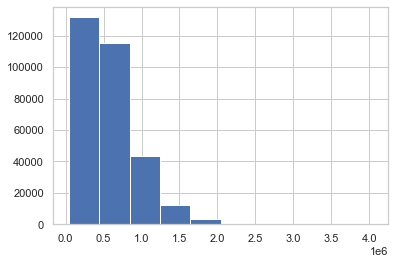

In [15]:
pre_train_data["AMT_GOODS_PRICE"].hist()

# credit_card_balance.csv
---

In [160]:
# load datasets
credit_card_ds = pd.read_csv(folder_path+"credit_card_balance.csv")

In [18]:
credit_card_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [19]:
credit_card_ds.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

## 1. 정규화

["MONTHS_BALANCE", ]

## 2. 결측치 to 0
```python
["AMT_DRAWINGS_ATM_CURRENT",
"AMT_DRAWINGS_OTHER_CURRENT"
"AMT_DRAWINGS_POS_CURRENT",
"AMT_INST_MIN_REGULARITY",
"AMT_PAYMENT_CURRENT",
"CNT_DRAWINGS_ATM_CURRENT",
"CNT_DRAWINGS_OTHER_CURRENT"
"CNT_DRAWINGS_POS_CURRENT",
"CNT_INSTALMENT_MATURE_CUM",]
```

In [161]:
# "MONTHS_BALANCE" = 대출 신청일 - 신용카드 잔액 갱신일
# 정규화 필요함
# check_feature(credit_card_ds, "MONTHS_BALANCE")

# "AMT_BALANCE" = 총 신용카드 결제 예정금액
# 정규화 필요
# check_feature(credit_card_ds, "AMT_BALANCE")

# "AMT_CREDIT_LIMIT_ACTUAL" = 신용카드 한도
# check_feature(credit_card_ds, "AMT_CREDIT_LIMIT_ACTUAL")

# "AMT_DRAWINGS_CURRENT" = 인출액
# check_feature(credit_card_ds, "AMT_DRAWINGS_CURRENT")

# "AMT_PAYMENT_TOTAL_CURRENT" = 신용카드 총 사용액
# check_feature(credit_card_ds, "AMT_PAYMENT_TOTAL_CURRENT")

# "AMT_RECEIVABLE_PRINCIPAL" = 미수(원)금
# check_feature(credit_card_ds, "AMT_RECEIVABLE_PRINCIPAL")

# "AMT_RECIVABLE" = 미수금
# check_feature(credit_card_ds, "AMT_RECIVABLE")

# "AMT_TOTAL_RECEIVABLE" = 미수금 총액
# check_feature(credit_card_ds, "AMT_TOTAL_RECEIVABLE")

# "CNT_DRAWINGS_CURRENT" = 인출 횟수
# check_feature(credit_card_ds, "CNT_DRAWINGS_CURRENT")
#####################################################################
                            # 결측치 0으로 처리함
#####################################################################
# "AMT_DRAWINGS_ATM_CURRENT" = ATM 인출액
# check_feature(credit_card_ds, "AMT_DRAWINGS_ATM_CURRENT")

# "AMT_DRAWINGS_OTHER_CURRENT" = 기타 인출액
# check_feature(credit_card_ds, "AMT_DRAWINGS_OTHER_CURRENT")

# "AMT_DRAWINGS_POS_CURRENT" = 인출 또는 구매 금액
# check_feature(credit_card_ds, "AMT_DRAWINGS_POS_CURRENT")

# "AMT_INST_MIN_REGULARITY" = 최소 할부금
# check_feature(credit_card_ds, "AMT_INST_MIN_REGULARITY")

# "AMT_PAYMENT_CURRENT" = 신용카드 사용액
# check_feature(credit_card_ds, "AMT_PAYMENT_CURRENT")
# "CNT_DRAWINGS_ATM_CURRENT" = ATM 인출 횟수
# check_feature(credit_card_ds, "CNT_DRAWINGS_ATM_CURRENT")

# "CNT_DRAWINGS_OTHER_CURRENT" = 기타 인출 횟수
# check_feature(credit_card_ds, "CNT_DRAWINGS_OTHER_CURRENT")

# "CNT_DRAWINGS_POS_CURRENT" = 제품 구매를 위한 인출 횟수
# check_feature(credit_card_ds, "CNT_DRAWINGS_POS_CURRENT")

# "CNT_INSTALMENT_MATURE_CUM" = 할부금 지불 횟수
# check_feature(credit_card_ds, "CNT_INSTALMENT_MATURE_CUM")
#####################################################################
zero_imputation_lists2 = ["AMT_DRAWINGS_ATM_CURRENT",
                          "AMT_DRAWINGS_OTHER_CURRENT",
                          "AMT_DRAWINGS_POS_CURRENT",
                          "AMT_INST_MIN_REGULARITY",
                          "AMT_PAYMENT_CURRENT",
                          "CNT_DRAWINGS_ATM_CURRENT",
                          "CNT_DRAWINGS_OTHER_CURRENT",
                          "CNT_DRAWINGS_POS_CURRENT",
                          "CNT_INSTALMENT_MATURE_CUM",
                         ]

for feature in zero_imputation_lists2:
    credit_card_ds.loc[:, feature].fillna(0, inplace=True)

#####################################################################


# "NAME_CONTRACT_STATUS" = 계약 상태
# check_feature(credit_card_ds, "NAME_CONTRACT_STATUS")

# "SK_DPD" = 연체 경과일
# check_feature(credit_card_ds, "SK_DPD")

# "SK_DPD_DEF" = 연체 경과일(소액 연체 제외)
# check_feature(credit_card_ds, "SK_DPD_DEF")

In [ ]:
corr = credit_card_ds.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt=".1g", vmin=-1, vmax=1, cmap="RdBu_r")

In [197]:
def scaling_and_encoding(datasets):
    # dtype이 object인 features 리스트 생성
    categorical_feature = \
        datasets.dtypes[datasets.dtypes == "object"].index.to_list()

    # dtype이 object가 아닌 numerical features 리스트 생성
    numerical_feature = \
        datasets.dtypes[datasets.dtypes != "object"].index.to_list()
    
    print(numerical_feature)
    ##########################################################
    # 숫자형 features를 RobustScaler()적용
    ##########################################################
    for feature in numerical_feature:
        rbscaler = RobustScaler()
        
        # RobustScaler로 datasets 변환
        temp_rbscaler = rbscaler.fit_transform(pd.DataFrame(datasets[feature]))

        # numpy.ndarray 반환됨
        datasets[feature] = temp_rbscaler
        # pd.DataFrame(c_card_rbscaler, columns=temp_c_card.columns)
    return datasets
    ##########################################################

NameError: name 'numerical_feature' is not defined

In [198]:
new_df = scaling_and_encoding(credit_card_ds.iloc[:, 2:])

['MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF']


In [191]:
new_df

,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,0.500000,0.000640,0.166667,0.0,877.5,0.0,877.5,0.302280,0.176520,0.266667,...,0.000000,0.000000,0.0,1.0,0.0,1.0,0.758621,Active,0.0,0.0
1,0.613636,0.718450,-0.500000,2250.0,2250.0,0.0,0.0,0.400000,0.233663,0.333333,...,0.729763,0.729640,1.0,1.0,0.0,0.0,1.931034,Active,0.0,0.0
2,0.477273,0.357287,2.500000,0.0,0.0,0.0,0.0,0.400000,0.233663,0.333333,...,0.353884,0.353824,0.0,0.0,0.0,0.0,0.586207,Active,0.0,0.0
3,0.545455,2.656720,0.833333,2250.0,2250.0,0.0,0.0,2.097024,1.462234,1.766667,...,2.621488,2.621045,1.0,1.0,0.0,0.0,-0.103448,Active,0.0,0.0
4,0.613636,5.097545,2.500000,0.0,11547.0,0.0,11547.0,4.075536,3.376520,4.000000,...,5.105985,5.105122,0.0,1.0,0.0,1.0,3.034483,Active,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,0.431818,0.000000,-0.500000,0.0,0.0,0.0,0.0,0.000000,-0.052051,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.448276,Active,0.0,0.0
3840308,0.431818,0.000000,-0.500000,0.0,0.0,0.0,0.0,0.000000,0.186566,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.344828,Active,0.0,0.0
3840309,0.431818,3.097083,3.500000,270000.0,270000.0,0.0,0.0,0.400000,47.662234,52.888100,...,3.071941,3.071422,2.0,2.0,0.0,0.0,0.172414,Active,0.0,0.0
3840310,0.409091,0.000000,2.500000,0.0,0.0,0.0,0.0,0.000000,-0.052051,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.448276,Active,0.0,0.0


In [225]:
import user_functions as uf
uf.check_feature(new_df, "AMT_DRAWINGS_ATM_CURRENT")

==================== describe ====================
count    3.840312e+06
mean     4.797384e+03
std      2.543070e+04
min     -6.827310e+03
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.115000e+06
Name: AMT_DRAWINGS_ATM_CURRENT, dtype: float64
==================== unique ====================
[     0.      2250.     67500.    ... 193608.72   24397.56   33538.725]
==================== value_counts ====================
0.000        3415534
4500.000       35851
9000.000       27726
45000.000      22946
2250.000       22854
              ...   
72720.000          1
85725.000          1
43984.215          1
44134.830          1
33538.725          1
Name: AMT_DRAWINGS_ATM_CURRENT, Length: 2267, dtype: int64
==================== isna ====================
False    3840312
Name: AMT_DRAWINGS_ATM_CURRENT, dtype: int64


In [206]:
check_feature(new_df, "AMT_DRAWINGS_ATM_CURRENT")
check_feature(credit_card_ds, "AMT_DRAWINGS_ATM_CURRENT")

==================== describe ====================
count    3.840312e+06
mean     4.797384e+03
std      2.543070e+04
min     -6.827310e+03
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.115000e+06
Name: AMT_DRAWINGS_ATM_CURRENT, dtype: float64
==================== unique ====================
[     0.      2250.     67500.    ... 193608.72   24397.56   33538.725]
==================== value_counts ====================
0.000        3415534
4500.000       35851
9000.000       27726
45000.000      22946
2250.000       22854
              ...   
72720.000          1
85725.000          1
43984.215          1
44134.830          1
33538.725          1
Name: AMT_DRAWINGS_ATM_CURRENT, Length: 2267, dtype: int64
==================== isna ====================
False    3840312
Name: AMT_DRAWINGS_ATM_CURRENT, dtype: int64
==================== describe ====================
count    3.840312e+06
mean     4.797384e+03
std      2.543070e+04
min     -6.827310e+03
25%      0.0

In [205]:
# RobustScaler object 생성
rbscaler = RobustScaler()

# RobustScaler로 datasets 변환
temp_c_card = credit_card_ds.drop(columns=["NAME_CONTRACT_STATUS"])
c_card_rbscaler = rbscaler.fit_transform(temp_c_card)

# numpy.ndarray 반환된 값 pandas.DataFrame으로 변환
c_card_rbscaler_df = pd.DataFrame(c_card_rbscaler, columns=temp_c_card.columns)


In [194]:
c_card_rbscaler_df

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
0,0.711554,0.564469,0.500000,0.000640,0.166667,0.0,877.5,0.0,877.5,0.302280,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.758621,0.0,0.0
1,0.732611,0.480268,0.613636,0.718450,-0.500000,2250.0,2250.0,0.0,0.0,0.400000,...,0.704963,0.729763,0.729640,1.0,1.0,0.0,0.0,1.931034,0.0,0.0
2,-0.167117,0.521102,0.477273,0.357287,2.500000,0.0,0.0,0.0,0.0,0.400000,...,0.315448,0.353884,0.353824,0.0,0.0,0.0,0.0,0.586207,0.0,0.0
3,-0.542439,0.333921,0.545455,2.656720,0.833333,2250.0,2250.0,0.0,0.0,2.097024,...,2.635324,2.621488,2.621045,1.0,1.0,0.0,0.0,-0.103448,0.0,0.0
4,-0.005991,-0.850980,0.613636,5.097545,2.500000,0.0,11547.0,0.0,11547.0,4.075536,...,5.190351,5.105985,5.105122,0.0,1.0,0.0,1.0,3.034483,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,-0.920500,0.279940,0.431818,0.000000,-0.500000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.448276,0.0,0.0
3840308,-0.194910,0.386442,0.431818,0.000000,-0.500000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.344828,0.0,0.0
3840309,-0.636188,-0.351780,0.431818,3.097083,3.500000,270000.0,270000.0,0.0,0.0,0.400000,...,3.155559,3.071941,3.071422,2.0,2.0,0.0,0.0,0.172414,0.0,0.0
3840310,-0.291194,0.853299,0.409091,0.000000,2.500000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.448276,0.0,0.0
